# Pymaceuticals Inc.
---

### Analysis

Our examination of mouse data revealed a noteworthy positive correlation between mouse weight and tumor volume. This observation suggests that, on average, mice with higher weights tend to exhibit larger tumor volumes. To visualize this relationship, a scatter plot was created, displaying the correlation between mouse weight (in grams) and tumor volume (in cubic millimeters).
 
The correlation coefficient, a statistical measure of the strength and direction of this relationship, was calculated to be 0.84. A positive correlation indicates that as mouse weight increases, tumor volume also tends to increase. Further details of this correlation can be found in the accompanying data summary.

Our analysis focused on four drugs: Capomulin, Ramicane, Infubinol, and Ceftamin. Among these, Capomulin and Ramicane emerged as particularly effective in reducing tumor sizes. The average final tumor size for mice treated with Capomulin and Ramicane was significantly smaller compared to the other two drugs, suggesting a higher efficacy in tumor reduction.

In [267]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_results_df=pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

# Display the data table for preview
data_results_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Mouse_metadata.csv'

In [204]:
# Checking the number of mice.
mice_count=data_results_df["Mouse ID"].nunique()
mice_count

249

In [205]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=data_results_df.loc[data_results_df.duplicated(subset=['Mouse ID', "Timepoint"]),"Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [206]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df=data_results_df.loc[data_results_df["Mouse ID"]=="g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [207]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=data_results_df[data_results_df["Mouse ID"].isin(dup_mice)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [208]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice=cleaned_df["Mouse ID"].nunique()
cleaned_mice

248

## Summary Statistics

In [209]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).mean()
median=cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).median()
variance=cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).var()
std=cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).std()
sem=cleaned_df["Tumor Volume (mm3)"].groupby(cleaned_df["Drug Regimen"]).sem()

summary_df=pd.DataFrame({"Mean Tumor Volume":mean,
                         "Median Tumor Volume":median,
                         "Tumor Volume Variance":variance,
                         "Tumor Volume Standard Deviataion":std,
                         "Tumor Volume Standarad Error":sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviataion,Tumor Volume Standarad Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [210]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg=cleaned_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

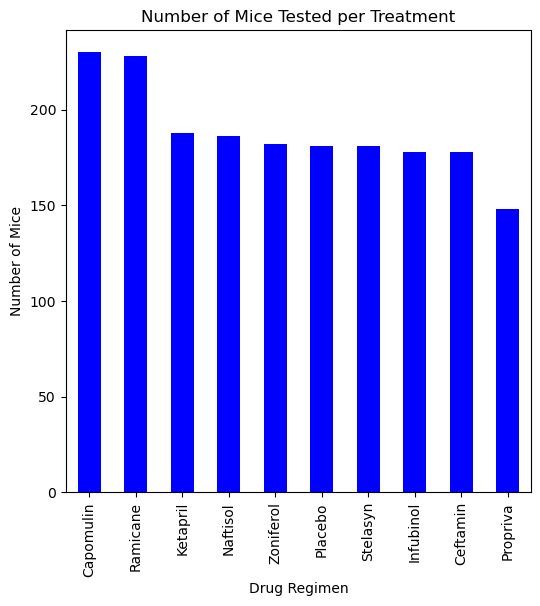

In [211]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count=cleaned_df["Drug Regimen"].value_counts()
mice_count
plot=mice_count.plot.bar(color="blue",
                          xlabel="Drug Regimen",
                          ylabel="Number of Mice",
                          title="Number of Mice Tested per Treatment")

In [212]:
mice_count=cleaned_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

In [213]:
drug_data_points=cleaned_df.groupby(["Drug Regimen"])

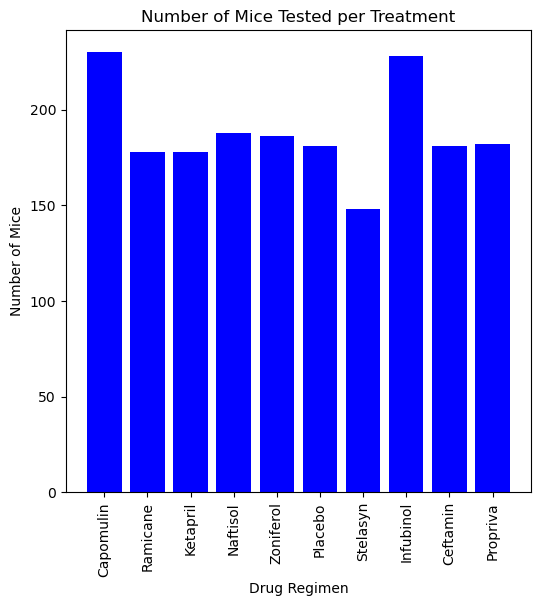

In [214]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_data=drug_data_points['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_data))

tick_locations=[value for value in x_axis]
drug_name=["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol","Ceftamin","Propriva"]
plt.xticks(tick_locations,drug_name,rotation=45)
plt.bar(x_axis, drug_data, color='blue',alpha=1, align='center')


plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

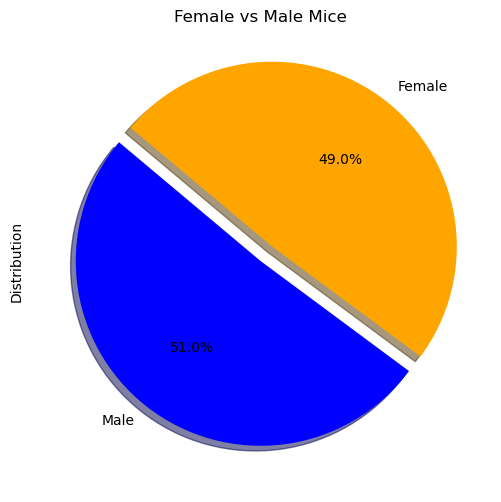

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df=cleaned_df["Sex"].value_counts()
plt.title("Female vs Male Mice")
explode=(0,0.1)
colors=["blue","orange"]
gender_df.plot(kind="pie",figsize=(6,6),explode=explode,colors=colors,
        ylabel="Distribution",xlabel="Sex",startangle=140,shadow=True,autopct="%1.1f%%")
plt.show()

In [216]:
gender_count=cleaned_df["Sex"].value_counts()
gender_count

Sex
Male      958
Female    922
Name: count, dtype: int64

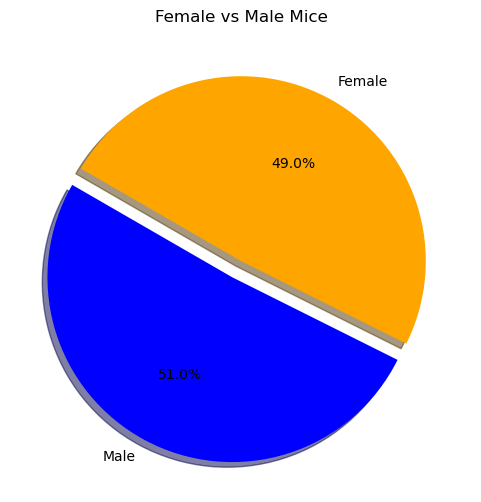

In [217]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=cleaned_df["Sex"]
labels=["Male","Female"]
sizes=[958,922]
plt.title("Female vs Male Mice")
colors=["blue","orange"]
explode=(.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
        autopct="%1.1f%%",shadow=True,startangle=150)
plt.show()

## Quartiles, Outliers and Boxplots

In [218]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Start by getting the last (greatest) timepoint for each mouse


In [219]:
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [220]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [221]:
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [222]:
#Ceftamin
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [223]:
treatment_list=["Capomulin","Ramicane", "Infubinol","Ceftamin"]
treatments= cleaned_df.loc[cleaned_df["Drug Regimen"].isin (treatment_list)]
treatments.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [224]:
last_t=treatments.groupby(["Drug Regimen","Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)",lambda x:x.iloc[-1]))
last_df=pd.DataFrame(last_t)
last_df=last_df.stack(level=0).unstack(level=0)
for treatment in treatment_list:
    print(treatment)


Capomulin
Ramicane
Infubinol
Ceftamin


In [225]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor=[]
ramicane_tumor=[]
infubinol_tumor=[]
ceftamin_tumor=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment_time=0
for treatment in treatment_list:
    quartiles=last_df[treatment].quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=round(upperq-lowerq)
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)

if treatment_time == 0:
    print(f"--------------------------")
print(f"The lower quartile of {treatment} treatments is: {lowerq}")
print(f"The upper quartile of {treatment} treatments is: {upperq}")
print(f"The  interquartile range of {treatment} treatments is: {iqr}")
print(f"The values below {lower_bound} could be {treatment} outliers.")
print(f"The values above {upper_bound} could be {treatment} outliers.")
treatment_time+=1


--------------------------
The lower quartile of Ceftamin treatments is: 48.72207785
The upper quartile of Ceftamin treatments is: 64.29983003
The  interquartile range of Ceftamin treatments is: 16
The values below 24.722077849999998 could be Ceftamin outliers.
The values above 88.29983003 could be Ceftamin outliers.


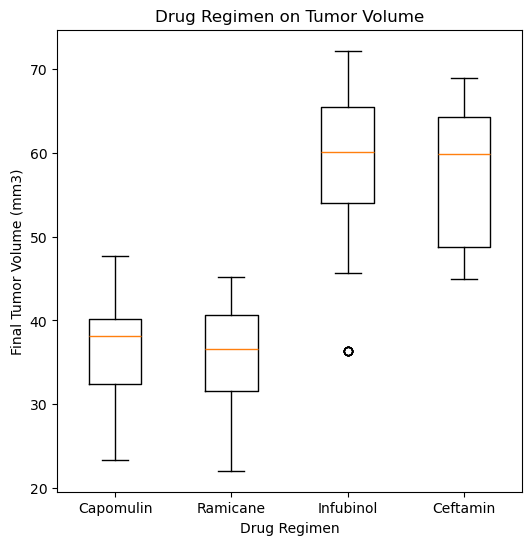

In [226]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_df=[drug_df[treatments[0]],
         drug_df[treatments[1]],
         drug_df[treatments[2]],
         drug_df[treatments[3]]]

# boxplot_data=
fig1,ax=plt.subplots()
ax.set_title("Drug Regimen on Tumor Volume")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xlabel("Drug Regimen")
ax.boxplot(boxplot_df, labels=treatments, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

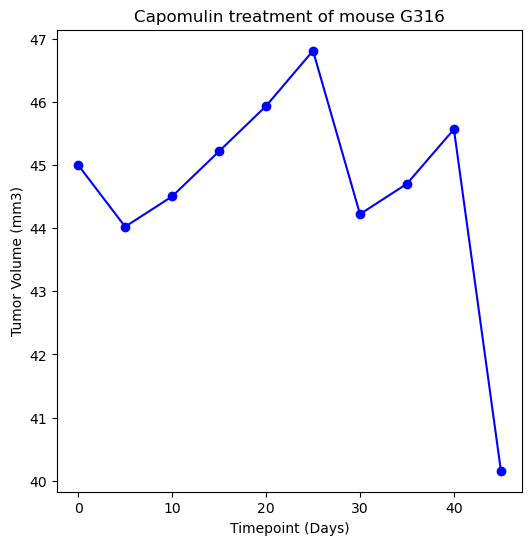

In [227]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df=capomulin_df.loc[capomulin_df["Mouse ID"]=="g316"]
line_df.head()
x_axis=line_df["Timepoint"]
tumor_size=line_df["Tumor Volume (mm3)"]

fig2,ax2=plt.subplots()
plt.title("Capomulin treatment of mouse G316")
plt.plot(x_axis,tumor_size,marker="o",color="blue")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

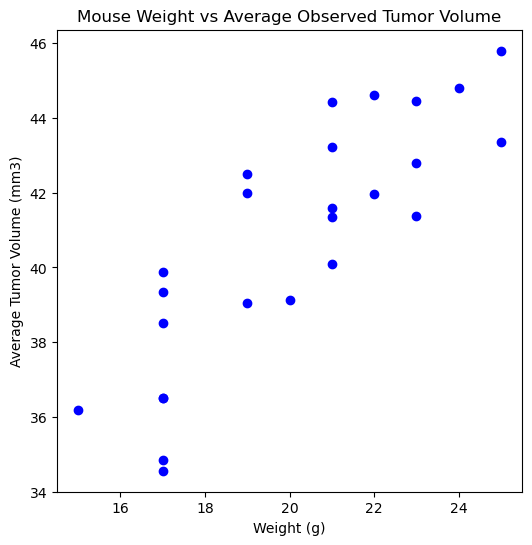

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


In [269]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()

avg_capomulin_vol = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(avg_capomulin_vol["Weight (g)"], avg_capomulin_vol["Tumor Volume (mm3)"], color="blue")
plt.title("Mouse Weight vs Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

avg_capomulin_vol

## Correlation and Regression

In [264]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=st.pearsonr(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


In [270]:
#plotting regression line
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"])
regress_values=avg_capomulin_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

The r-squared is: 0.709


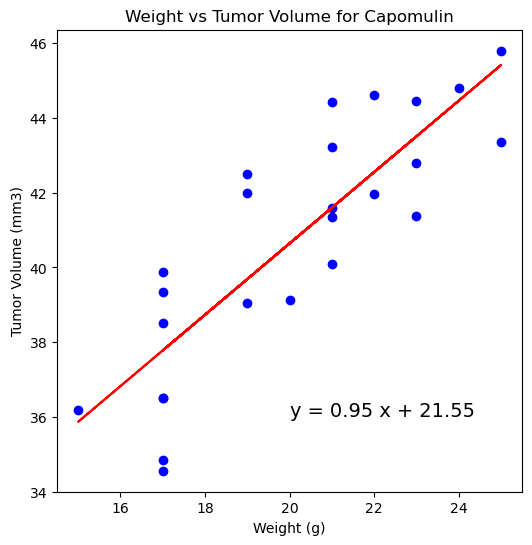

In [271]:
plt.scatter(avg_capomulin_vol["Weight (g)"],avg_capomulin_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capomulin_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()